In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../')
import geoplot.crs as ccrs
import geoplot as gplt
%matplotlib inline

In [2]:
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')

In [3]:
boroughs['Population'] = [378, 1951, 2300, 1487, 1203]
boroughs['Population Density'] = boroughs['Population'] / boroughs['Shape_Area']

In [5]:
cdata = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

# Limited test
# collisions = gpd.GeoDataFrame(cdata.head(1000), geometry=cdata.head(1000).apply(pointify, axis='columns'))
# collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

# Full test
collisions = gpd.GeoDataFrame(cdata.head(10000), geometry=cdata.head(10000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

del cdata

In [6]:
nycpoints = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [2]:
citibike = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/citibike-sankey/master/data/linesegments.csv", index_col=0)

In [13]:
def geometries(srs):
    start = Point(srs['Start X'], srs['Start Y'])
    end = Point(srs['End X'], srs['End Y'])
    return pd.Series({'From': start, 'To': end})

to_and_from = citibike.sample(1000).apply(geometries, axis='columns')

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1301)network()
-> if not ax:
(Pdb) c
KDE extent:  (-180.0, 180.0, -89.5, 89.5)
(40.64902, 40.789050000000003, -74.017899999999997, -73.926389999999998)


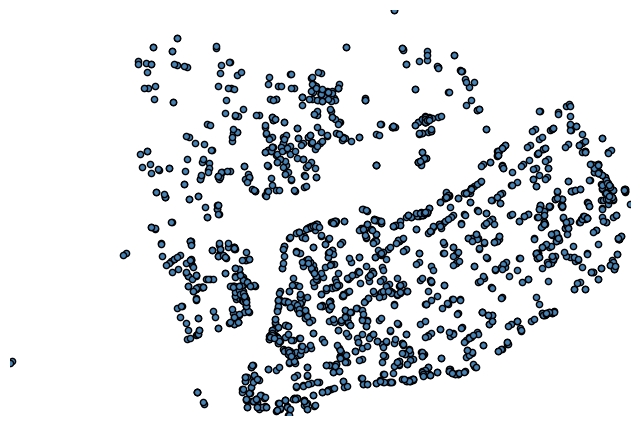

In [25]:
gplt.network(citibike, start=to_and_from['From'], end=to_and_from['To'], projection=ccrs.PlateCarree())

Polyplot extent:  (-74.25732936872762, -73.69858257397418, 40.496009990549084, 40.915635170819286)


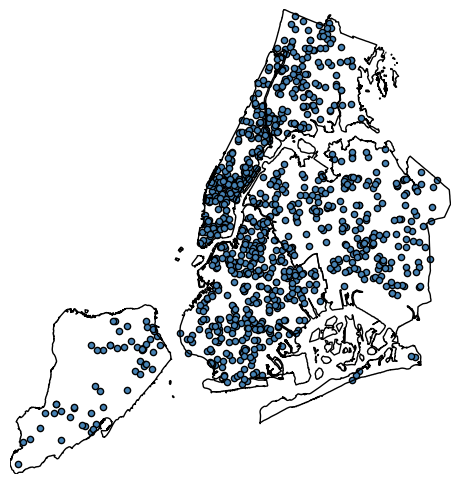

In [9]:
ax = gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())
gplt.pointplot(nycpoints, projection=ccrs.AlbersEqualArea(), ax=ax)

Polyplot extent:  (-74.25732936872762, -73.69858257397418, 40.496009990549084, 40.915635170819286)


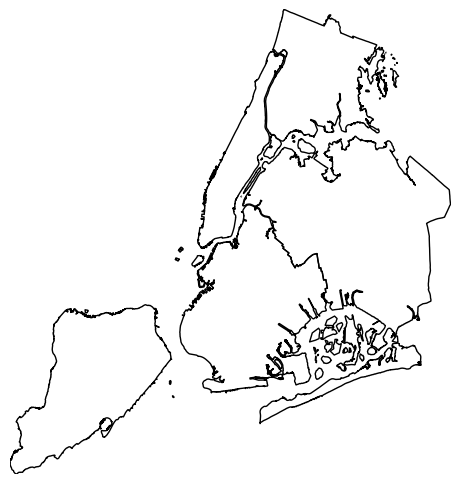

In [4]:
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())

Polyplot extent:  (-74.25559136315215, -73.70000906387122, 40.49611539517034, 40.91553277700519)


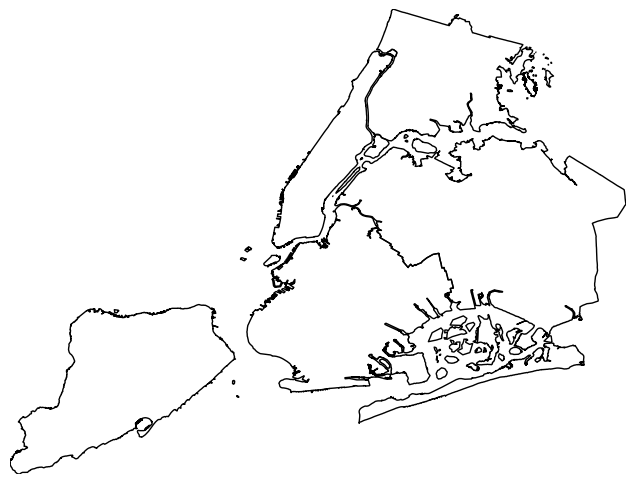

In [31]:
gplt.polyplot(boroughs, projection=ccrs.PlateCarree())

Polyplot extent:  (-74.25559136315215, -73.70000906387122, 40.49611539517034, 40.91553277700519)


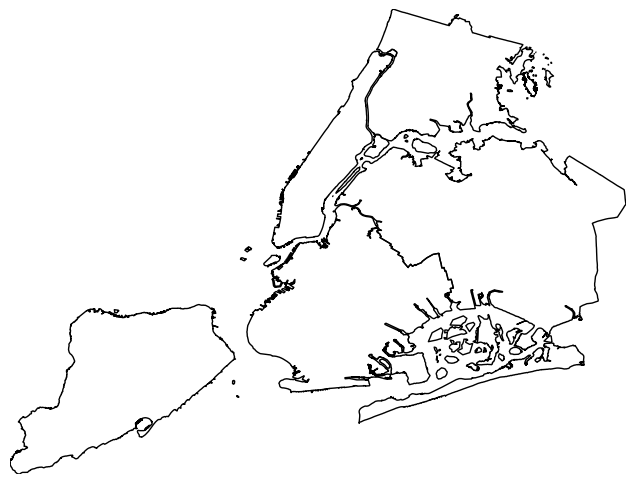

In [37]:
ax = gplt.polyplot(boroughs, projection=ccrs.PlateCarree())
# gplt.kdeplot(collisions, projection=ccrs.PlateCarree())
gplt.kdeplot(collisions, projection=ccrs.PlateCarree(), ax=ax)
# gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

(40.505369000000002, 40.912468100000005, -74.245621999999997, -73.703589900000011)


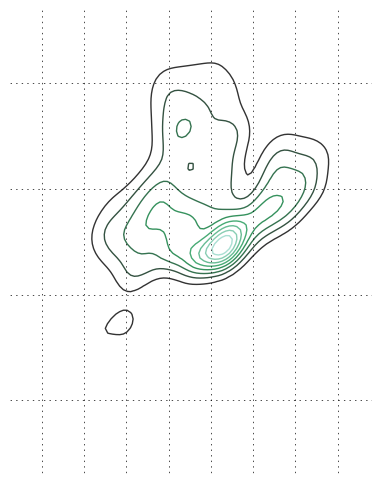

In [87]:
gplt.kdeplot(collisions, projection=ccrs.PlateCarree(), gridlines=True)

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1023)cartogram()
-> _paint_carto_legend(ax, values, legend_values, legend_labels, dscale, legend_kwargs)
(Pdb) c


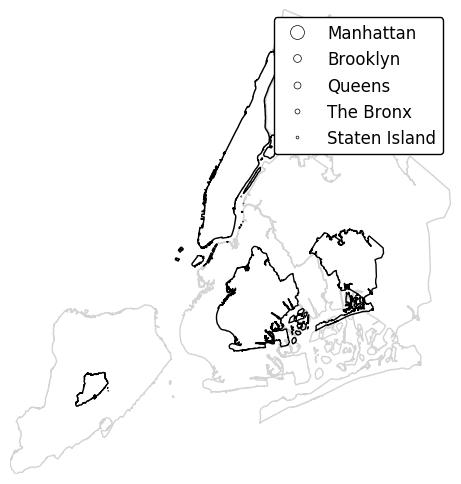

In [65]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(), legend=True,
               legend_values=[2.32779655e-07, 6.39683197e-07, 1.01364661e-06, 1.17380941e-06, 2.33642596e-06][::-1],
               legend_labels=['Manhattan', 'Brooklyn', 'Queens', 'The Bronx', 'Staten Island'])

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1021)cartogram()
-> _paint_carto_legend(ax, values, legend_values, dscale, legend_kwargs)
(Pdb) c


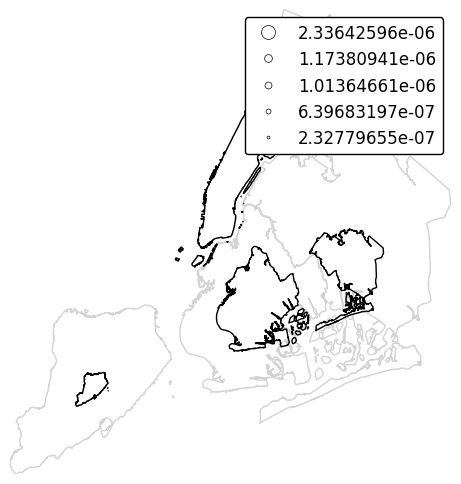

In [62]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(), legend=True,
               legend_values=[2.32779655e-07, 6.39683197e-07, 1.01364661e-06, 1.17380941e-06, 2.33642596e-06][::-1])

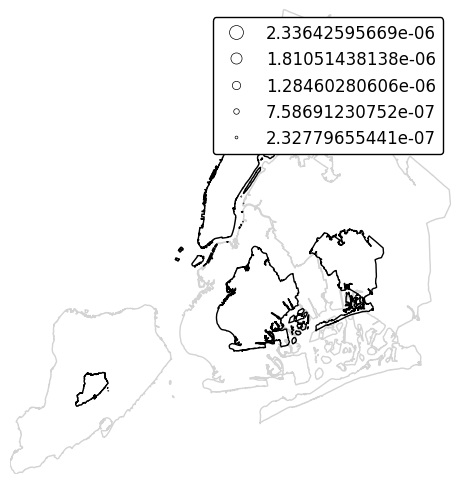

In [69]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(), legend=True)

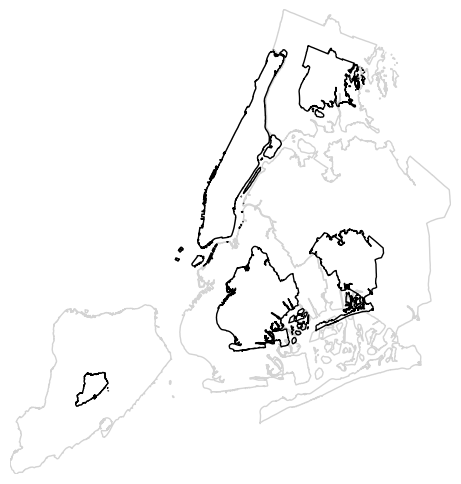

In [43]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea())

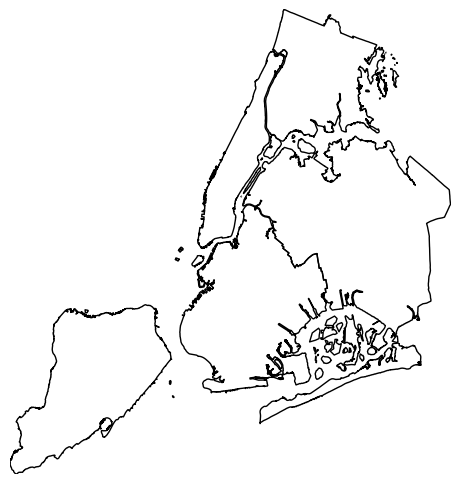

In [11]:
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())

In [4]:
cdata = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

# Limited test
# collisions = gpd.GeoDataFrame(cdata.head(1000), geometry=cdata.head(1000).apply(pointify, axis='columns'))
# collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

# Full test
collisions = gpd.GeoDataFrame(cdata.head(10000), geometry=cdata.head(10000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

del cdata

In [5]:
latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()
    
def genpattern(srs):
    return (srs['LATITUDE'] - latmin) / (latmax - latmin)

collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

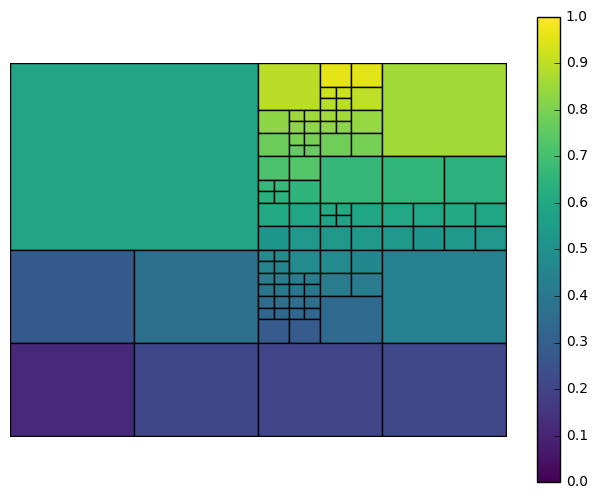

In [6]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='LATDEP')

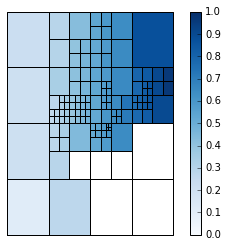

In [59]:
gplt.aggplot(collisions, nmin=20, nmax=500, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Blues')

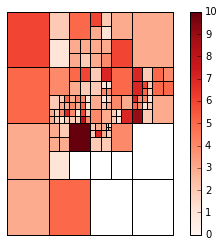

In [63]:
gplt.aggplot(collisions, nmin=20, nmax=500, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             agg=np.max)

KeyError: 0

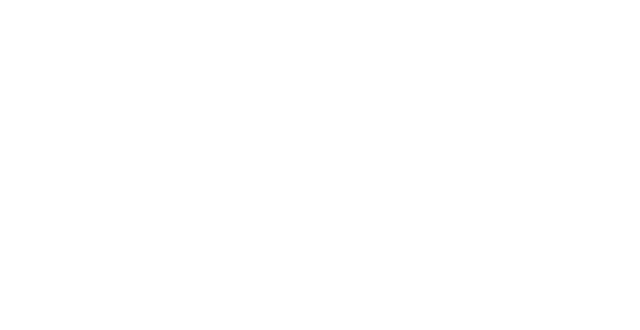

In [9]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds', by='BOROUGH')

In [6]:
# census_tracts = gpd.read_file("./data/nyc_census_tracts_2010.geojson", driver='GeoJSON')
# cleaned_geom = census_tracts.geometry.buffer(0)

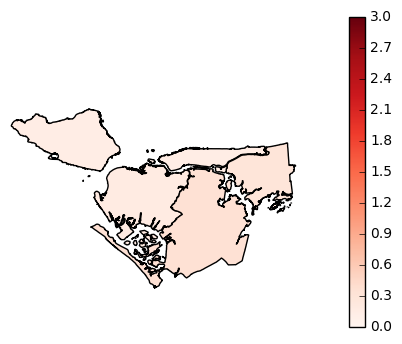

In [81]:
boroughs = gpd.read_file("./data/boroughs.geojson", driver='GeoJSON')
boroughs = boroughs.set_index('BoroName')
boroughs.index = [b.upper() for b in boroughs.index]
gplt.aggplot(collisions.head(100), projection=ccrs.AlbersEqualArea(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs, by='BOROUGH')

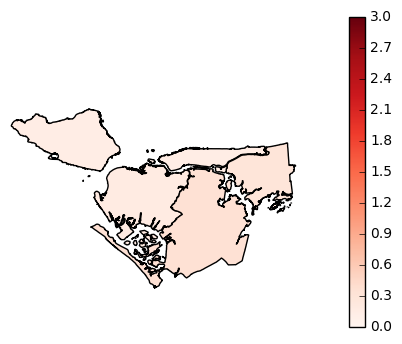

In [76]:
boroughs = gpd.read_file("./data/boroughs.geojson", driver='GeoJSON')
boroughs = boroughs.set_index('BoroName')
boroughs.index = [b.upper() for b in boroughs.index]
gplt.aggplot(collisions.head(100), projection=ccrs.AlbersEqualArea(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs, by='BOROUGH')

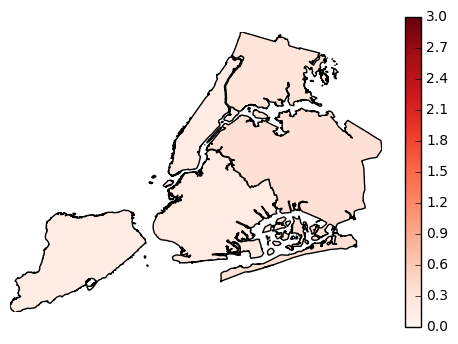

In [75]:
boroughs = gpd.read_file("./data/boroughs.geojson", driver='GeoJSON')
boroughs = boroughs.set_index('BoroName')
boroughs.index = [b.upper() for b in boroughs.index]
gplt.aggplot(collisions.head(100), projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs, by='BOROUGH')

# Old

In [4]:
from random import randint
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]

In [ ]:
# This keeps blowing up my kernel?
gplt.choropleth(census_tracts, hue='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5)

In [5]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

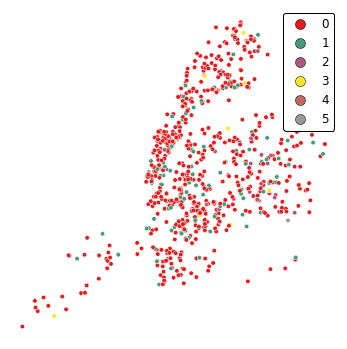

In [6]:
gplt.pointplot(cc, projection=ccrs.AlbersEqualArea(), edgecolor='white', color='steelblue', linewidth=0.5,
               hue='NUMBER OF PERSONS INJURED', categorical=True, legend=True)

In [6]:
# gplt.aggplot(collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')], cutoff=100)

In [5]:
gib = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

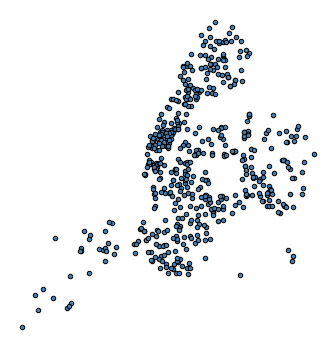

In [7]:
gplt.pointplot(gib, projection=ccrs.AlbersEqualArea())

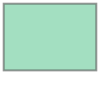

In [45]:
import shapely.geometry

xmin, xmax, ymin, ymax = (-74.234975799999987, -73.968483799999987, 40.714092449999995, 40.9060062)
shapely.geometry.Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])

In [ ]:
import shapely.geometry

fig = plt.figure()

xmin, xmax, ymin, ymax = (0, 2, 0, 2)
shapely.geometry.Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])

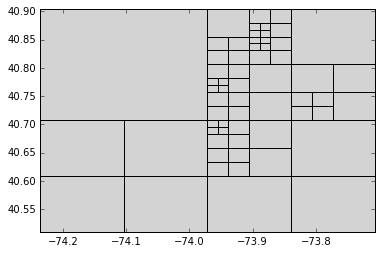

In [26]:
gplt.aggplot(gib, threshold=2)

In [34]:
import geoplot.crs as ccrs

In [ ]:
gplt.aggplot(gib, threshold=2, projection=ccrs.AlbersEqualArea())

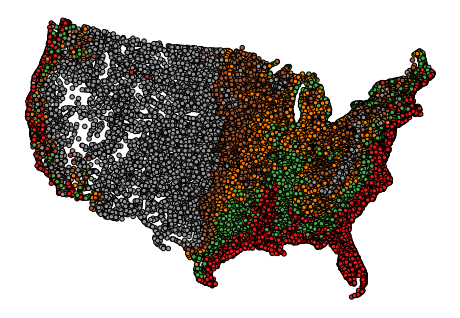

In [10]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT')

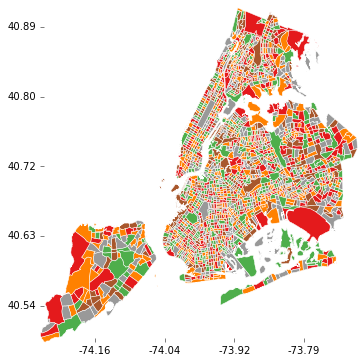

In [37]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                scheme='QUANTILES')

In [40]:
census_tracts['mock_category'] = [randint(1, 5) for _ in range(len(census_tracts))]

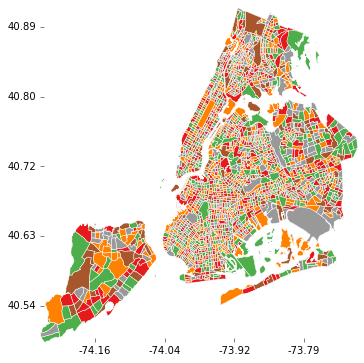

In [42]:
gplt.choropleth(census_tracts, data='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True)

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(144)choropleth()
-> categories = np.unique(data)
(Pdb) c
> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(171)choropleth()
-> patches = []
(Pdb) c


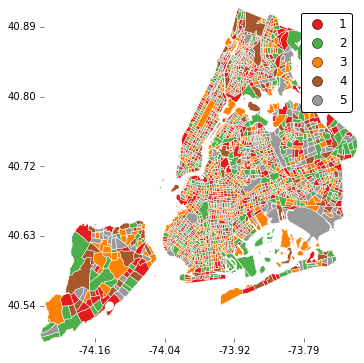

In [53]:
gplt.choropleth(census_tracts, data='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True)

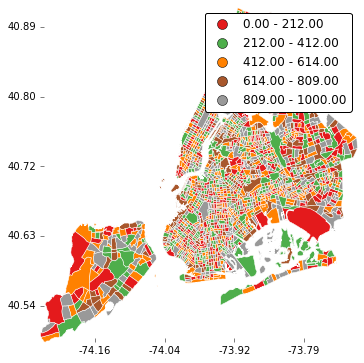

In [65]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True)

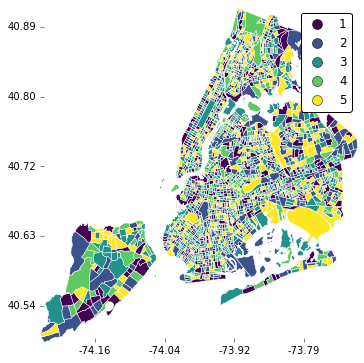

In [71]:
gplt.choropleth(census_tracts, hue='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True, categorical=True, cmap='viridis')

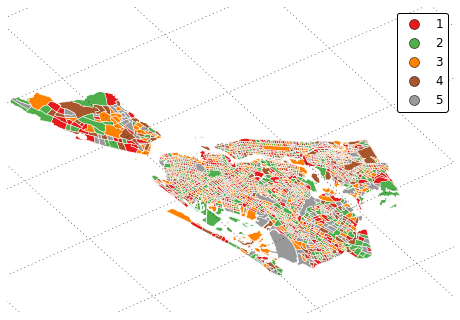

In [179]:
gplt.choropleth(census_tracts, hue='mock_category', projection=ccrs.Gnomonic(), edgecolor='white', linewidth=0.5,
                legend=True, categorical=True, gridlines=True)